In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [24]:
#Para agua gaseosa
A=30.092
B=6.832
C=6.793
D=-2.53448
E=0.082139

deltaH_298=-241.826 #kJ/mol
deltaS_298=188.835  #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos
t=T/1000
Cp_H2O_gas=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_gas=np.cumsum(Cp_H2O_gas*dT)+deltaH_298*1000 #para calcular delta H. se mutipica por mil porque estan en kJ/mol
deltaS_gas=np.cumsum(Cp_H2O_gas/T*dT)+deltaS_298
deltaG_gas=deltaH_gas-T*deltaS_gas

In [27]:
#Para agua liquida
A=-203.606
B=1523.290
C=-3196.413
D=2474.455
E=3.855

deltaH_298=-285.830 #kJ/mol
deltaS_298=69.95  #J/mol

dT=0.1
T=np.arange(300,400,dT) #se esta generando una matriz con los datos
t=T/1000
Cp_H2O_liq=A+B*t+C*t**2+D*t**3+E/t**2
deltaH_liq=np.cumsum(Cp_H2O_liq*dT)+deltaH_298*1000 #para calcular delta H. se mutipica por mil porque estan en kJ/mol
deltaS_liq=np.cumsum(Cp_H2O_liq/T*dT)+deltaS_298
deltaG_liq=deltaH_liq-T*deltaS_liq

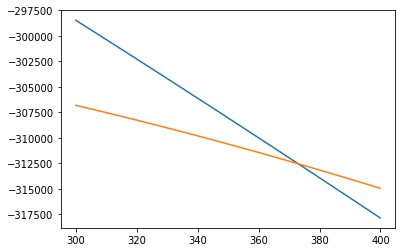

In [28]:
plt.plot(T,deltaG_gas)
plt.plot(T,deltaG_liq)
plt.show()
#en el punto donde se cruzan, corresponde al punto de ebullicion del agua (373 K), donde Ggas=Gliq
#se encuentra el minimo de una parabola de la diferencia de Ggas-Gliq elevados al cuadrado

In [32]:
#para calcular ese minimo
dp=(deltaG_gas-deltaG_liq)**2
minimo=np.min(dp)
np.where(dp==minimo) #donde esta el minimo

(array([730]),)

In [34]:
T[730] #introducir el valor anterior para encontrar el valor real del p. eb. 

373.0000000000166

In [35]:
#Para el NO2
import requests

In [64]:
#directo desde la web
#cambio de una informacion desde la web a una matriz en numpy
url="https://janaf.nist.gov/tables/N-007.txt"
file=requests.get(url)
datos=file.text
datos=datos.split("\n")[3:-1]
mat=[] #para cambiar la cadena a numero
for x in datos:
    s=x.split("\t")
    print(s)
    mat.append([float(a) for a in (s)]) #cambia una lista de cadenas a cadena de numeros punto flotante
mat=np.array(mat)

    

['100', '33.276', '202.563', '271.168', '-6.861', '34.898', '39.963', '-20.874']
['200', '34.385', '225.852', '243.325', '-3.495', '33.897', '45.422', '-11.863']
['250', '35.593', '233.649', '240.634', '-1.746', '33.460', '48.355', '-10.103']
['298.15', '36.974', '240.034', '240.034', '0.', '33.095', '51.258', '-8.980']
['300', '37.029', '240.262', '240.034', '0.068', '33.083', '51.371', '-8.944']
['350', '38.583', '246.086', '240.491', '1.958', '32.768', '54.445', '-8.125']
['400', '40.171', '251.342', '241.524', '3.927', '32.512', '57.560', '-7.517']
['450', '41.728', '256.164', '242.886', '5.975', '32.310', '60.703', '-7.046']
['500', '43.206', '260.638', '244.440', '8.099', '32.154', '63.867', '-6.672']
['600', '45.834', '268.755', '247.830', '12.555', '31.959', '70.230', '-6.114']
['700', '47.986', '275.988', '251.345', '17.250', '31.878', '76.616', '-5.717']
['800', '49.708', '282.512', '254.840', '22.138', '31.874', '83.008', '-5.420']
['900', '51.076', '288.449', '258.250', '27

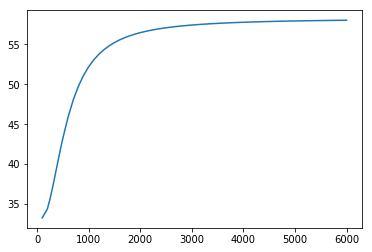

In [65]:
T=mat[:,0]
Cp=mat[:,1]
plt.plot(T,Cp)
plt.show()

In [66]:
T=T[3:16]
y=Cp[3:16]
t=T/1000
n=len(T)
X=np.array([np.ones(n),t,t**2,t**3,1/t**2]).T
beta=np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
beta

array([ 16.10851352,  75.89539116, -54.3872296 ,  14.30775044,
         0.23942371])

In [67]:
Cp_calc=beta.dot(X.T)


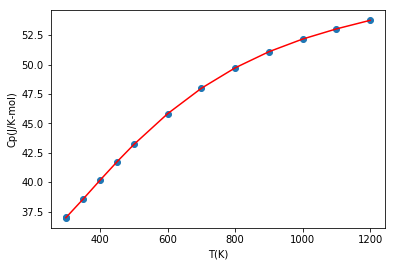

In [70]:
plt.scatter(T,y)
plt.plot(T,Cp_calc,color="red")
plt.xlabel("T(K)")
plt.ylabel("Cp(J/K-mol)")
plt.show()